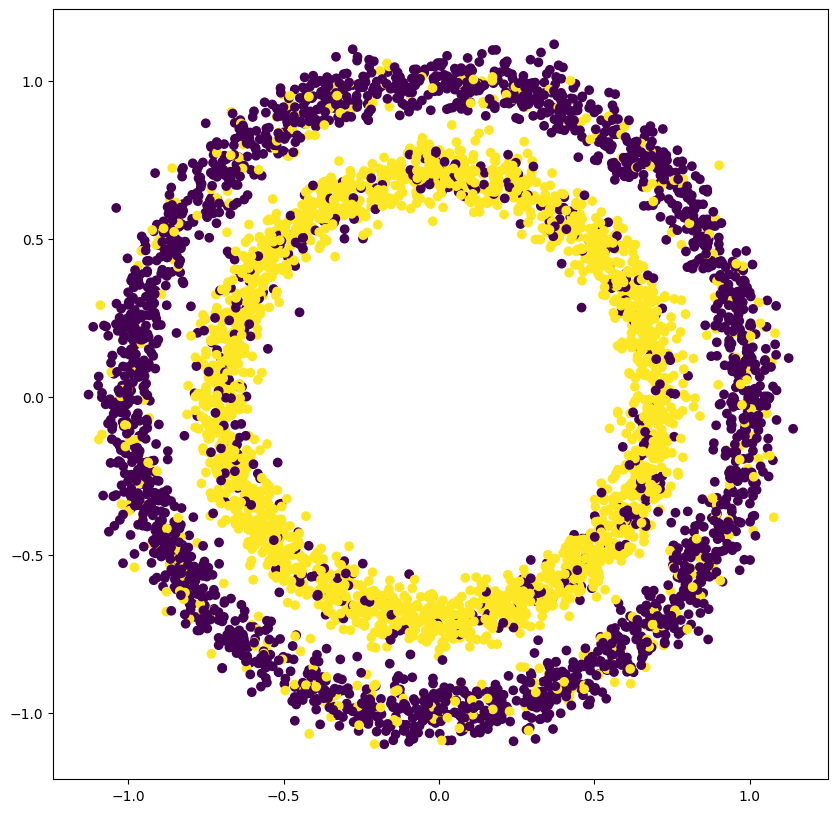

In [1]:
import os, sys, time, numpy, torch, matplotlib.pyplot

sys.path.append(os.path.abspath(os.path.join('../..')))  # Allow repository modules to be imported

from settings.concentric_spheres import get_dataloader
from utils.optimization import initialize

experiment = {
    'seed': 1,
    'dataset': 'cs',
    'input_dimension': 100, 
    'spheres_dimension': 2, 
    'number_of_spheres': 4, 
    'sample_size': 5000, 
    'batch_size': 5000, 
    'margin': 0.3, 
    'noise_std': 0.05,
    'label_flipping': 0.15,
    'epochs': 10000,
    'learning_rate': 0.01,
    'initial_hidden_units': 2,
    'bias': True,
    'convergence_epsilon': 0.00001,
    'target_accuracy': 0.85
}
override = True

device, generator = initialize(experiment['seed'])
train_data, rotation_matrix = get_dataloader(**experiment, generator=generator)
test_data = get_dataloader(**experiment, rotation_matrix=rotation_matrix, generator=generator)
inputs = []; labels = []
for batch_inputs, batch_labels in train_data: inputs.append(batch_inputs); labels.append(batch_labels)
inputs, labels = torch.concatenate(inputs), torch.concatenate(labels)

fig, ax = matplotlib.pyplot.subplots(figsize=(10, 10))
inputs_ = numpy.matmul(inputs.detach().cpu().numpy(), rotation_matrix.transpose())
ax.scatter(inputs_[:, 0], inputs_[:, 1], c=labels)

In [3]:
import ipycanvas

training_canvas, growth_metrics_canvas, input_domain_canvas = ipycanvas.Canvas(), ipycanvas.Canvas(), ipycanvas.Canvas()
training_canvas.width, training_canvas.height = 1200, 600
growth_metrics_canvas.width = 1200; growth_metrics_canvas.height = 400
input_domain_canvas.width = input_domain_canvas.height = 800
training_canvas.font = growth_metrics_canvas.font = input_domain_canvas.font = "30px arial"
args = ('Results will appear as processed', training_canvas.width / 4, training_canvas.height / 3)
training_canvas.fill_text(*args); growth_metrics_canvas.fill_text(*args); input_domain_canvas.fill_text(*args)

In [4]:
training_canvas

Canvas(height=600, width=1200)

In [5]:
growth_metrics_canvas

Canvas(height=400, width=1200)

In [6]:
input_domain_canvas

Canvas(height=800, width=800)

In [6]:
from functools import partial
from utils.plots import plot_train_loss_and_accuracy, plot_weights_and_biases_gradient_norms, plot_samples_activation_hyperplanes
from plots import plot_growth_metrics
from utils.models import FullyConnectedNeuralNetwork
from experiment import execute_experiment

plot_train_loss_and_accuracy = partial(plot_train_loss_and_accuracy, canvas=training_canvas)
plot_growth_metrics = partial(plot_growth_metrics, canvas=growth_metrics_canvas)
plot_weights_and_biases_gradient_norms = partial(plot_weights_and_biases_gradient_norms, canvas=gradients_norms_canvas)
plot_samples_activation_hyperplanes = partial(plot_samples_activation_hyperplanes, canvas=input_domain_canvas, 
                                              rotation_matrix=rotation_matrix, dataloader=train_data)

def model_summary(model, model_metrics, epoch, *args, **kwargs):
    for layer_index, layer in enumerate(model.layers):
        layer_metrics = {'epoch': epoch, 'layer': layer_index, 'hidden_units': layer.weight.shape[0],
                         'neurons_weights_norm': layer.weight.norm(dim=1).detach().cpu().tolist()}
        if experiment['bias']: layer_metrics.update({'biases': layer.bias.detach().cpu().tolist()})
        model_metrics.append(layer_metrics)
        
    model_metrics.append({'epoch': epoch, 'layer': len(model.layers), 'hidden_units': model.output_layer.weight.shape[1],
                          'neurons_weights_norm': model.output_layer.weight.abs().squeeze(dim=0).detach().cpu().tolist()})
    
execute_experiment(
    **experiment,
    experiment_name_parameters=['seed'],
    train_data=train_data, 
    test_data=test_data, 
    model_class=FullyConnectedNeuralNetwork,
    saving_epochs_interval=experiment['epochs'],
    callbacks=[model_summary, plot_train_loss_and_accuracy, plot_growth_metrics, 
               plot_weights_and_biases_gradient_norms, plot_samples_activation_hyperplanes],
    override=True
)

Convergence achieve according to convergence_epsilon = 1e-05
Width growth: Two unit with opposing signs were added to layer 0 which now has 4 units
Convergence achieve according to convergence_epsilon = 1e-05
Width growth: Two unit with opposing signs were added to layer 0 which now has 6 units
Convergence achieve according to convergence_epsilon = 1e-05
Width growth: Two unit with opposing signs were added to layer 0 which now has 8 units
Convergence achieve according to convergence_epsilon = 1e-05
Width growth: Two unit with opposing signs were added to layer 0 which now has 10 units
Convergence achieve according to convergence_epsilon = 1e-05
Width growth: Two unit with opposing signs were added to layer 0 which now has 12 units
Convergence achieve according to convergence_epsilon = 1e-05
Width growth: Two unit with opposing signs were added to layer 0 which now has 14 units
Convergence achieve according to convergence_epsilon = 1e-05
Width growth: Two unit with opposing signs were 

KeyboardInterrupt: 